# РК1 Ишков Денис ИУ5-24М 2021г.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('contest_train_binary.csv.zip')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Columns: 262 entries, ID to FEATURE_259
dtypes: float64(260), int64(2)
memory usage: 49.0 MB


### Задача №6.
### Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения средним значением.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Название признака: FEATURE_72
Процент пропусков: 11.34%
Среднее значение: 127.85



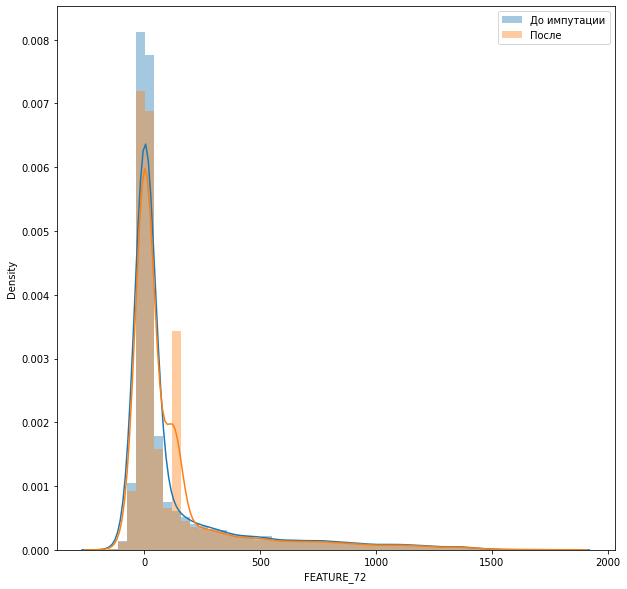

In [4]:
plt.figure(figsize=(10, 10))
#FEATURE_72
#FEATURE_162
col = 'FEATURE_72'
if df[col].isna().mean() > 0.0:
    isnan = df[col].isna()
    miss_percentage = isnan.mean()*100
    mean = df.loc[~isnan, col].mean()
    sns.distplot(df[col], label='До импутации')
    print('Название признака: {}\n'
          'Процент пропусков: {:.2f}%\n'
          'Среднее значение: {:.2f}\n'.format(col, miss_percentage, mean))
    df.loc[df[col].isna(), col] = df.loc[~df[col].isna(), col].mean()
    sns.distplot(df[col], label='После')
    plt.legend()

### Задача №26.
### Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе правила трех сигм.

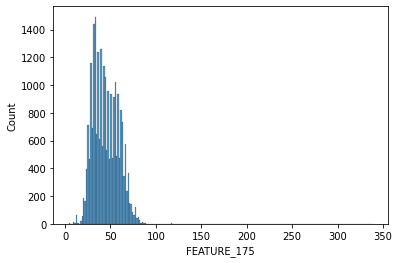

In [5]:
#FEATURE_175
feature = 'FEATURE_175'
sns.histplot(df[feature])

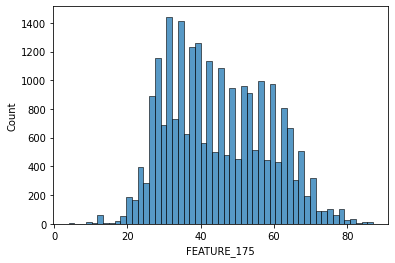

In [6]:
# Обрезка
three_sigma = df[feature].std()*3
df = df[df[feature].between(df[feature].mean()-three_sigma,
                               df[feature].mean()+three_sigma)].copy()
sns.histplot(df[feature])

### Дополнительное задание для группы ИУ5-24М
Для студентов группы ИУ5-24М - для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


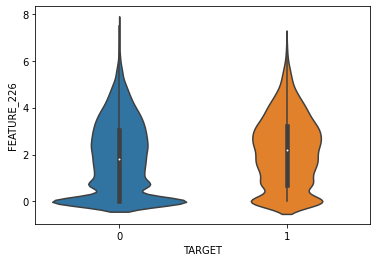

In [178]:
sns.violinplot(df.TARGET, np.log(1+df[df.columns[228]]))